In [1]:
import pandas as pd
from pandas import DataFrame as df
data= pd.read_csv('mcdonalds.csv')
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [2]:
data.columns.values.tolist()

['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 'Like',
 'Age',
 'VisitFrequency',
 'Gender']

In [3]:
data.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [4]:
data.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [5]:
data.shape[0]

1453

In [6]:
data.shape[1]

15

In [7]:
data.shape

(1453, 15)

In [8]:
import numpy as np
cols= data[['yummy','convenient','spicy','fattening','greasy','fast','cheap','tasty','expensive','healthy','disgusting']]
binary_data =cols.replace({'Yes': 1, 'No': 0})
md = binary_data.to_numpy()
print(md)


[[0 1 0 ... 1 0 0]
 [1 1 0 ... 1 0 0]
 [0 1 1 ... 1 1 0]
 ...
 [1 1 0 ... 1 0 0]
 [1 1 0 ... 0 1 0]
 [0 1 0 ... 1 0 1]]


C:\Users\moksh\AppData\Local\Temp\ipykernel_27004\3024120561.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  binary_data =cols.replace({'Yes': 1, 'No': 0})


In [9]:
column_avg = np.mean(md, axis=0)
print("Column-wise Average:")
for i, avg in enumerate(column_avg, start=1):
    print(f"Column {i}: {avg}")


Column-wise Average:
Column 1: 0.5526496902959395
Column 2: 0.9077770130763937
Column 3: 0.09359944941500344
Column 4: 0.8671713695801789
Column 5: 0.5264969029593943
Column 6: 0.9002064693737095
Column 7: 0.5987611837577426
Column 8: 0.6441844459738472
Column 9: 0.35788024776324845
Column 10: 0.1988988300068823
Column 11: 0.2429456297315898


In [10]:
from sklearn.decomposition import PCA
pca = PCA()
pca_components = pca.fit_transform(md)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Number of Components:", pca.n_components_)

Explained Variance Ratio: [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
Number of Components: 11


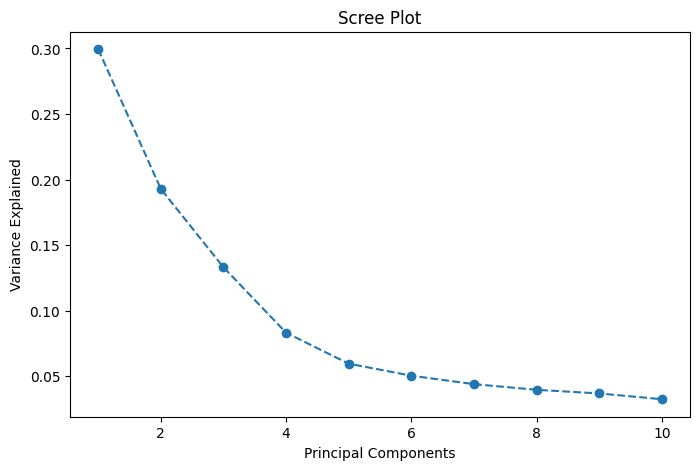

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()

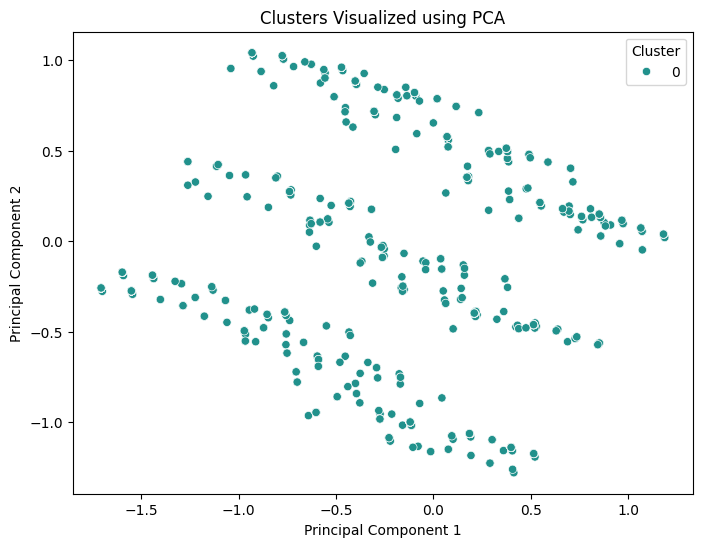

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
kmeans = KMeans(n_clusters=1, random_state=42)
clusters = kmeans.fit_predict(pca_components)
data['Cluster'] = clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=clusters, palette='viridis')
plt.title('Clusters Visualized using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [16]:
#use this method to get colomn names in the matrix
MD=data.iloc[:,0:11].replace("Yes",1).replace("No",0)
mean=round(MD.mean(),2)
mean

C:\Users\moksh\AppData\Local\Temp\ipykernel_27004\1019767598.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  MD=data.iloc[:,0:11].replace("Yes",1).replace("No",0)


yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [13]:
pca = PCA()
MD_pca=pca.fit_transform(MD)
MD_p=pca.fit(MD)

SD=np.sqrt(pca.explained_variance_)
PV=pca.explained_variance_ratio_
index=[]
for i in range(len(SD)):
    i=i+1
    index.append("PC{}".format(i))

sum=pd.DataFrame({
    "Standard deviation":SD,"Proportion of Variance":PV,"Cumulative Proportion":PV.cumsum()
},index=index)
print(sum)

      Standard deviation  Proportion of Variance  Cumulative Proportion
PC1             0.757050                0.299447               0.299447
PC2             0.607456                0.192797               0.492244
PC3             0.504619                0.133045               0.625290
PC4             0.398799                0.083096               0.708386
PC5             0.337405                0.059481               0.767866
PC6             0.310275                0.050300               0.818166
PC7             0.289697                0.043849               0.862015
PC8             0.275122                0.039548               0.901563
PC9             0.265251                0.036761               0.938323
PC10            0.248842                0.032353               0.970677
PC11            0.236903                0.029323               1.000000


In [17]:
print("Standard Deviation:\n",SD.round(1))

load = (pca.components_)
i=0
rot_matrix = MD_p.components_.T

rot_df = pd.DataFrame(rot_matrix, index=MD.columns.values, columns=index)
rot_df=round(-rot_df,3)
rot_df

Standard Deviation:
 [0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,-0.477,0.364,-0.304,-0.055,-0.308,0.171,0.281,0.013,0.572,-0.110,0.045
convenient,-0.155,0.016,-0.063,0.142,0.278,-0.348,0.060,-0.113,-0.018,-0.666,-0.542
spicy,-0.006,0.019,-0.037,-0.198,0.071,-0.355,-0.708,0.376,0.400,-0.076,0.142
fattening,0.116,-0.034,-0.322,0.354,-0.073,-0.407,0.386,0.590,-0.161,-0.005,0.251
greasy,0.304,-0.064,-0.802,-0.254,0.361,0.209,-0.036,-0.138,-0.003,0.009,0.002
fast,-0.108,-0.087,-0.065,0.097,0.108,-0.595,0.087,-0.628,0.166,0.240,0.339
cheap,-0.337,-0.611,-0.149,-0.119,-0.129,-0.103,0.040,0.140,0.076,0.428,-0.489
tasty,-0.472,0.307,-0.287,0.003,-0.211,-0.077,-0.360,-0.073,-0.639,0.079,0.020
expensive,0.329,0.601,0.024,-0.068,-0.003,-0.261,0.068,0.030,0.067,0.454,-0.490
healthy,-0.214,0.077,0.192,-0.763,0.288,-0.178,0.350,0.176,-0.186,-0.038,0.158


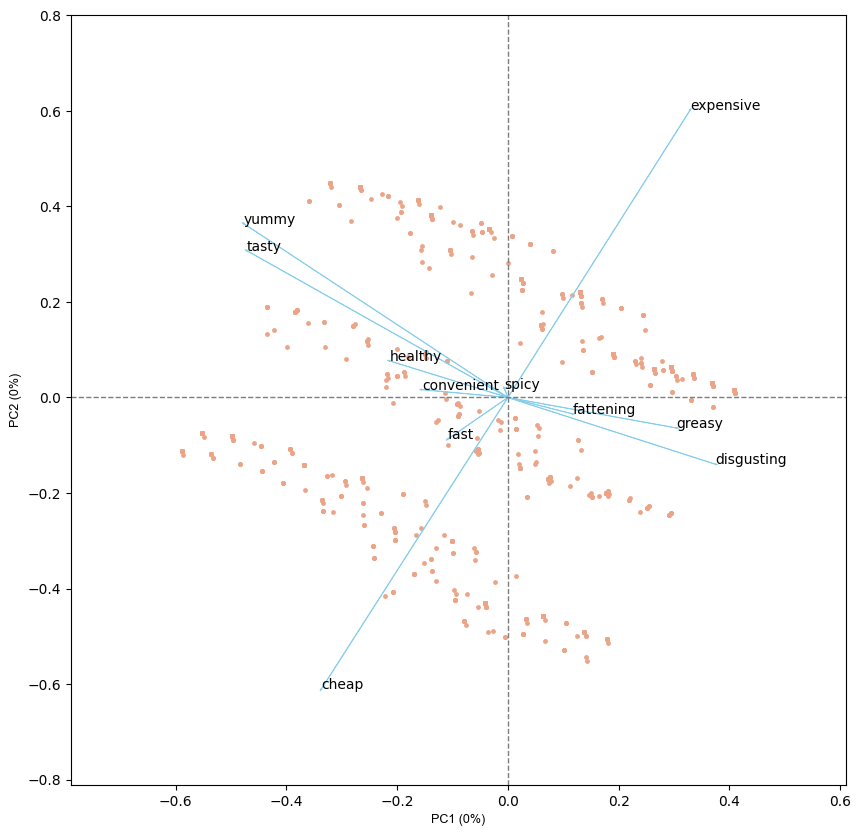

In [18]:
from bioinfokit.visuz import cluster
cluster.biplot(cscore=MD_pca, loadings=-load, labels=data.columns.values,var1=0,var2=0, show=True, dim=(10, 10))